<h1 style="text-align: center;"> SC1015 Team 10 A124 Project: Sleep Efficiency </h1>

## Table of Contents
* [Section 1. Initial Data Set](#chapter1)
    * [1.1 Data Cleaning](#section_1_1)
        * [Dropping Columns, Label Encoding, Data Conversion](#sub_section_1_1_1)
        * [Duplicates](#sub_section_1_1_2)
        * [Missing Values](#sub_section_1_1_3)
* [Section 2. Exploratory Data Analysis](#chapter2)
    * [2.1 Uni-Variate Statistics on Sleep Efficiency](#section_2_1)
    * [2.2 Multi-Variate Statistics](#section_2_2)
        * [2.2.1 Sleep Efficiency vs Categorical Variables](#sub_section_2_2_1)
            * [Gender](#sub_sub_section_2_2_1_1)
            * [Smoking Status](#sub_sub_section_2_2_1_2)
        * [2.2.2 Sleep Efficiency vs Numerical Variables](#sub_section_2_2_2)
            * [PairPlot](#sub_sub_section_2_2_2_1)
            * [Correlation Heatmap](#sub_sub_section_2_2_2_2)
              * [T-Test](#sub_sub_section_2_2_2_3)
* [Section 3. Outlier Removal, Splitting Dataset & Scaling](#chapter3)
    * [3.1 Outlier Removal](#section_3_1)
    * [3.2 Splitting Dataset](#section_3_2)
    * [3.3 Scaling Dataset](#section_3_3)
* [Section 4. Training Models](#chapter4)
    * [4.1 Multi-Variate Linear Regression Model](#section_4_1)
    * [4.2 Lasso Regression Model](#section_4_2)
    * [4.3 XGVBoost Model](#section_4_3)
* [Section 5. Feature Importance](#chapter5)
----


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
from scipy import stats
from scipy.stats import ttest_ind

## Section 1. Initial Data Set <a class="anchor" id="chapter1"></a>
---

In [ ]:
data=pd.read_csv("Sleep_Efficiency.csv")
data.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

Description of the dataset:

> **ID** : a unique identifier for each test subject  
> **Age** : age of the test subject  
> **Gender** : male or female  
> **Bedtime** : the time the test subject goes to bed each night  
> **Wakeup time** : the time the test subject wakes up each morning    
> **Sleep duration** : the total amount of time the test subject slept (in hours)  
> **Sleep efficiency** : a measure of the proportion of time in bed spent asleep   
> **REM sleep percentage** : the percentage of total sleep time spent in REM sleep  
> **Deep sleep percentage** : the percentage of total sleep time spent in deep sleep   
> **Light sleep percentage** : the percentage of total sleep time spent in light sleep     
> **Caffeine consumption** : the amount of caffeine consumed in the 24 hours prior to bedtime (in mg)  
> **Alcohol consumption** : the amount of alcohol consumed in the 24 hours prior to bedtime (in oz)  
> **Smoking status** : whether or not the test subject smokes  
> **Exercise frequency** : the number of times the test subject exercises each week




### 1.1 Data Cleaning: <a class="anchor" id="section_1_1"></a>

#### Dropping Columns, Label Encoding, Data Conversion: <a class="anchor" id="sub_section_1_1_1"></a>


> *  Dropped "ID" column as it wasn't relevant
> * Converted "Smoking Status" & "Gender" from strings to integers using Label Encoding
> *  Converted "Bedtime" and "Wakeup Time" columns to Unix timestamps




In [ ]:
data_clean = data.copy()
data_clean.columns = data_clean.columns.str.upper()
data_clean.columns = data_clean.columns.str.replace(" ","_")

data_clean.drop('ID', axis =1, inplace=True)

# Smoking Status 'Yes' - 1. 'No' -0
data_clean.loc[ data_clean['SMOKING_STATUS'] == 'Yes', 'SMOKING_STATUS'] = 1
data_clean.loc[ data_clean['SMOKING_STATUS'] == 'No', 'SMOKING_STATUS'] = 0

# Gender 'Female' - 1. 'Male' -0

data_clean.loc[ data_clean['GENDER'] == 'Female', 'GENDER'] = 1
data_clean.loc[ data_clean['GENDER'] == 'Male', 'GENDER'] = 0

# The Unix epoch (or Unix time or POSIX time or Unix timestamp) is the number of seconds that have elapsed since January 1, 1970 (midnight UTC/GMT),
data_clean['BEDTIME'] = pd.to_datetime(data_clean['BEDTIME'], format='%Y-%m-%d %H:%M:%S')
data_clean['BEDTIME'] = data_clean['BEDTIME'].apply(lambda x: int(x.timestamp()))
data_clean['WAKEUP_TIME'] = pd.to_datetime(data_clean['WAKEUP_TIME'], format='%Y-%m-%d %H:%M:%S')
data_clean['WAKEUP_TIME'] = data_clean['WAKEUP_TIME'].apply(lambda x: int(x.timestamp()))

#Moves Sleep Efficacy to back
data_clean = data_clean.reindex(columns = [col for col in data_clean.columns if col != 'SLEEP_EFFICIENCY'] + ['SLEEP_EFFICIENCY'])

#Changes object columns to int
data_clean['SMOKING_STATUS'] = data_clean['SMOKING_STATUS'].astype('int')
data_clean['GENDER'] = data_clean['GENDER'].astype('int')

data_clean.head()

,AGE,GENDER,BEDTIME,WAKEUP_TIME,SLEEP_DURATION,REM_SLEEP_PERCENTAGE,DEEP_SLEEP_PERCENTAGE,LIGHT_SLEEP_PERCENTAGE,AWAKENINGS,CAFFEINE_CONSUMPTION,ALCOHOL_CONSUMPTION,SMOKING_STATUS,EXERCISE_FREQUENCY,SLEEP_EFFICIENCY
0,65,1,1614992400,1615014000,6.0,18,70,12,0.0,0.0,0.0,1,3.0,0.88
1,69,0,1638669600,1638694800,7.0,19,28,53,3.0,0.0,3.0,1,3.0,0.66
2,40,1,1621978200,1621920600,8.0,20,70,10,1.0,0.0,0.0,0,3.0,0.89
3,40,1,1635906600,1635928200,6.0,23,25,52,3.0,50.0,5.0,1,1.0,0.51
4,57,0,1615597200,1615626000,8.0,27,55,18,3.0,0.0,3.0,0,3.0,0.76


#### Duplicates: <a class="anchor" id="sub_section_1_1_2"></a>

In [ ]:
#Check for duplicated rows
bool_series = data_clean.duplicated()
p= bool_series.value_counts().to_frame()
print(bool_series.value_counts())
dup_count= bool_series.size - p.iloc[0,0]
print(f"The number of duplicates are {dup_count}")

False    452
dtype: int64
The number of duplicates are 0


> *  All the rows are *unique*; there are no duplicates



#### Missing Values: <a class="anchor" id="sub_section_1_1_3"></a>

In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     452 non-null    int64  
 1   GENDER                  452 non-null    int64  
 2   BEDTIME                 452 non-null    int64  
 3   WAKEUP_TIME             452 non-null    int64  
 4   SLEEP_DURATION          452 non-null    float64
 5   REM_SLEEP_PERCENTAGE    452 non-null    int64  
 6   DEEP_SLEEP_PERCENTAGE   452 non-null    int64  
 7   LIGHT_SLEEP_PERCENTAGE  452 non-null    int64  
 8   AWAKENINGS              432 non-null    float64
 9   CAFFEINE_CONSUMPTION    427 non-null    float64
 10  ALCOHOL_CONSUMPTION     438 non-null    float64
 11  SMOKING_STATUS          452 non-null    int64  
 12  EXERCISE_FREQUENCY      446 non-null    float64
 13  SLEEP_EFFICIENCY        452 non-null    float64
dtypes: float64(6), int64(8)
memory usage: 49.6

In [ ]:
#Counts number of NaN values
missingdf= data_clean.isna()
missingdf.sum()

AGE                        0
GENDER                     0
BEDTIME                    0
WAKEUP_TIME                0
SLEEP_DURATION             0
REM_SLEEP_PERCENTAGE       0
DEEP_SLEEP_PERCENTAGE      0
LIGHT_SLEEP_PERCENTAGE     0
AWAKENINGS                20
CAFFEINE_CONSUMPTION      25
ALCOHOL_CONSUMPTION       14
SMOKING_STATUS             0
EXERCISE_FREQUENCY         6
SLEEP_EFFICIENCY           0
dtype: int64

There exists NaN values in AWAKENINGS, CAFFEINE_CONSUMPTION & ALCOHOL_CONSUMPTION as shown above.

> * Used 10% Trimmed Mean to fill in NaN values




In [ ]:
data_clean = data_clean.apply(lambda x: x.fillna(stats.trim_mean(x, 0.1)), axis=0)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     452 non-null    int64  
 1   GENDER                  452 non-null    int64  
 2   BEDTIME                 452 non-null    int64  
 3   WAKEUP_TIME             452 non-null    int64  
 4   SLEEP_DURATION          452 non-null    float64
 5   REM_SLEEP_PERCENTAGE    452 non-null    int64  
 6   DEEP_SLEEP_PERCENTAGE   452 non-null    int64  
 7   LIGHT_SLEEP_PERCENTAGE  452 non-null    int64  
 8   AWAKENINGS              452 non-null    float64
 9   CAFFEINE_CONSUMPTION    452 non-null    float64
 10  ALCOHOL_CONSUMPTION     452 non-null    float64
 11  SMOKING_STATUS          452 non-null    int64  
 12  EXERCISE_FREQUENCY      452 non-null    float64
 13  SLEEP_EFFICIENCY        452 non-null    float64
dtypes: float64(6), int64(8)
memory usage: 49.6

## Section 2. Exploratory Data Analysis <a class="anchor" id="chapter2"></a>
---

### 2.1 Uni-Variate Statistics on Sleep Efficiency: <a class="anchor" id="section_2_1"></a>

In [ ]:
a = pd.DataFrame(data_clean['SLEEP_EFFICIENCY'])
a.describe()

,SLEEP_EFFICIENCY
count,452.000000
mean,0.788916
std,0.135237
min,0.500000
25%,0.697500
50%,0.820000
75%,0.900000
max,0.990000


Kurtosis: 
SLEEP_EFFICIENCY   -0.719611
dtype: float64

Skew: 
SLEEP_EFFICIENCY   -0.650274
dtype: float64


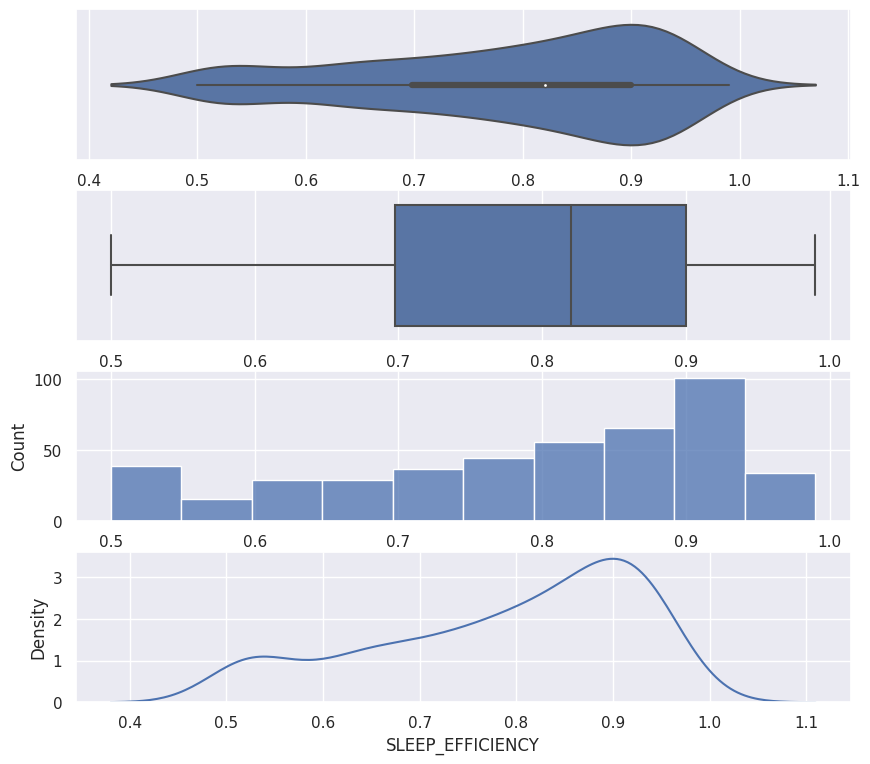

In [ ]:
f, axes = plt.subplots(4, figsize=(10, 9))
sb.violinplot(data = data_clean, x='SLEEP_EFFICIENCY', ax=axes[0])
sb.boxplot(data=data_clean, x='SLEEP_EFFICIENCY', ax=axes[1])
sb.histplot(data = data_clean, x='SLEEP_EFFICIENCY', ax = axes[2])
sb.kdeplot(data = data_clean, x='SLEEP_EFFICIENCY', ax = axes[3])


print("Kurtosis: ")
print(data_clean[['SLEEP_EFFICIENCY']].kurtosis(axis = 0, skipna = True))
print("\nSkew: ")
print(data_clean[['SLEEP_EFFICIENCY']].skew(axis = 0, skipna = True))

### 2.2 Multi-Variate Statistics: <a class="anchor" id="section_2_2"></a>

In [ ]:
eda_dataset = data_clean.copy()
eda_dataset.describe()

,AGE,GENDER,BEDTIME,WAKEUP_TIME,SLEEP_DURATION,REM_SLEEP_PERCENTAGE,DEEP_SLEEP_PERCENTAGE,LIGHT_SLEEP_PERCENTAGE,AWAKENINGS,CAFFEINE_CONSUMPTION,ALCOHOL_CONSUMPTION,SMOKING_STATUS,EXERCISE_FREQUENCY,SLEEP_EFFICIENCY
count,452.000000,452.000000,4.520000e+02,4.520000e+02,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,40.285398,0.495575,1.626135e+09,1.626121e+09,7.465708,22.615044,52.823009,24.561947,1.643023,23.578907,1.167970,0.340708,1.790984,0.788916
std,13.172250,0.500534,8.957783e+06,8.955555e+06,0.866625,3.525963,15.654235,15.313665,1.326365,29.355363,1.596315,0.474472,1.418609,0.135237
min,9.000000,0.000000,1.609634e+09,1.609663e+09,5.000000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
25%,29.000000,0.000000,1.618362e+09,1.618387e+09,7.000000,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.697500
50%,40.000000,0.000000,1.626824e+09,1.626797e+09,7.500000,22.000000,58.000000,18.000000,1.000000,22.306630,0.000000,0.000000,2.000000,0.820000
75%,52.000000,1.000000,1.633930e+09,1.633932e+09,8.000000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,1.000000,3.000000,0.900000
max,69.000000,1.000000,1.640984e+09,1.640932e+09,10.000000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,1.000000,5.000000,0.990000


#### 2.2.1 Sleep Efficiency vs Categorical Variables: <a class="anchor" id="sub_section_2_2_1"></a>

##### Gender: <a class="anchor" id="sub_sub_section_2_2_1_1"></a>

<Axes: xlabel='GENDER', ylabel='SLEEP_EFFICIENCY'>

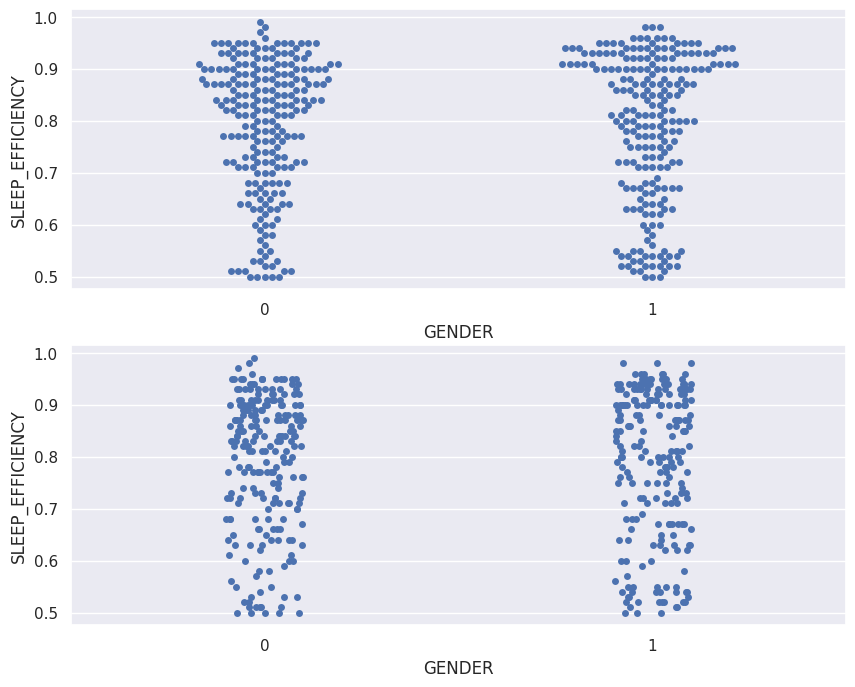

In [ ]:
categorical_eda = pd.DataFrame(eda_dataset[['GENDER','SMOKING_STATUS', 'SLEEP_EFFICIENCY']])

f, axes = plt.subplots(2, figsize=(10,8))
sb.swarmplot(data = categorical_eda, x='GENDER', y='SLEEP_EFFICIENCY', ax=axes[0])
sb.stripplot(data = categorical_eda, x='GENDER', y='SLEEP_EFFICIENCY', ax=axes[1])

<Axes: xlabel='GENDER', ylabel='SLEEP_EFFICIENCY'>

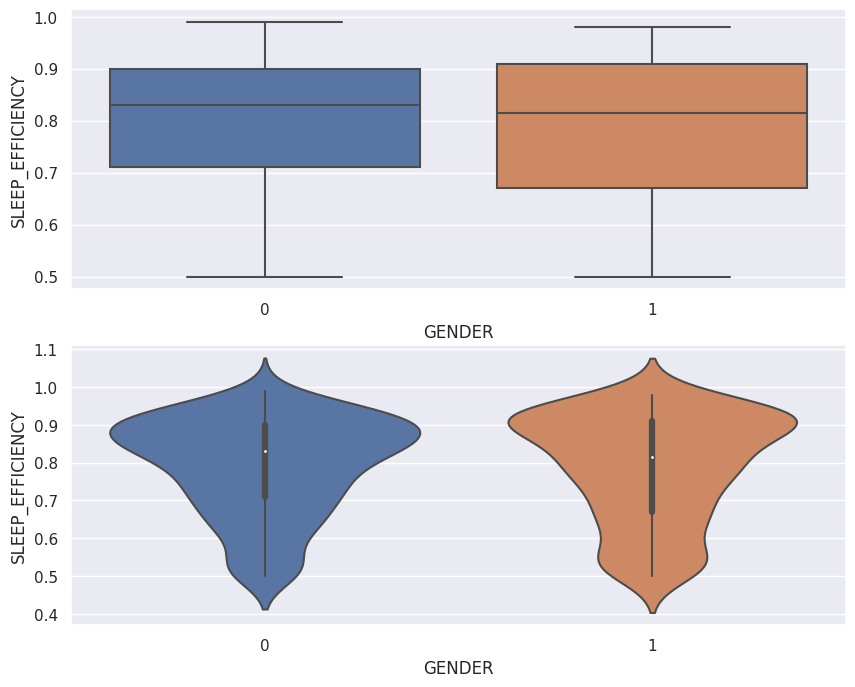

In [ ]:
f, axes = plt.subplots(2, figsize=(10, 8))
sb.boxplot(data=categorical_eda, x="GENDER", y="SLEEP_EFFICIENCY",  ax=axes[0])
sb.violinplot(data = categorical_eda, x='GENDER', y='SLEEP_EFFICIENCY', ax=axes[1])

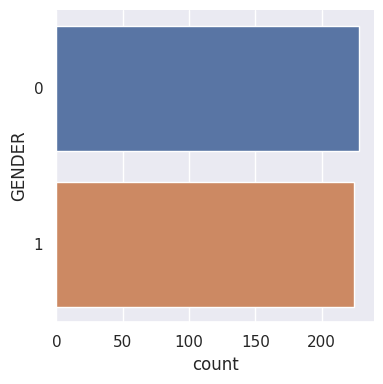

In [ ]:
sb.catplot(y = "GENDER", data = categorical_eda, kind = "count",
           order = categorical_eda["GENDER"].value_counts().index, height = 4)

__Conclusions about Gender__:
>* Even split of genders in data set   
>* Gender is likely not a significant prediction factor for Sleep Effiency
>    * Boxplot doesn't show much difference between the two graphs
>    * Median, IQR & Range are similar across genders

##### Smoking Status: <a class="anchor" id="sub_sub_section_2_2_1_2"></a>

<Axes: xlabel='SMOKING_STATUS', ylabel='SLEEP_EFFICIENCY'>

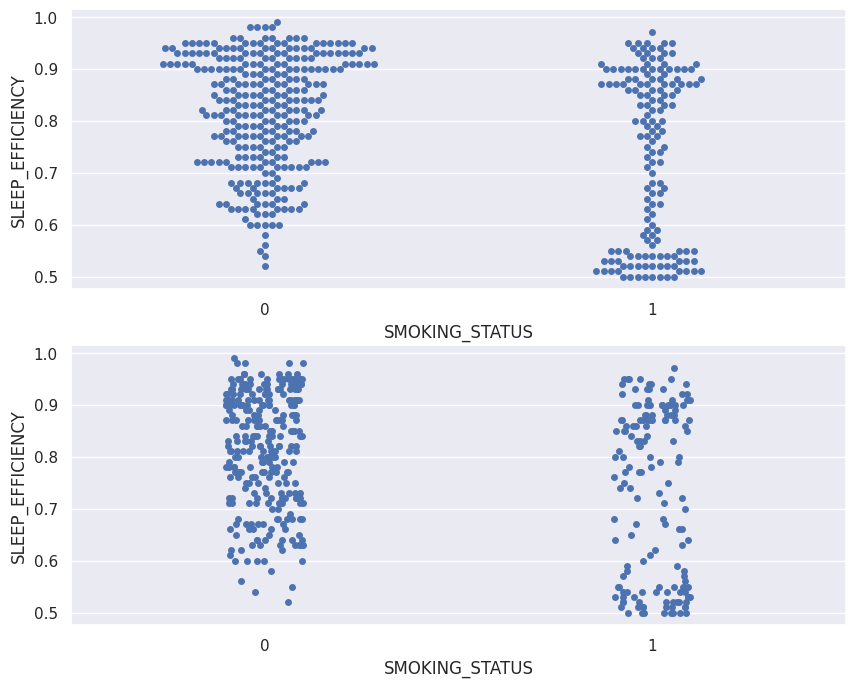

In [ ]:
f, axes = plt.subplots(2, figsize=(10, 8))
sb.swarmplot(data = categorical_eda, x='SMOKING_STATUS', y='SLEEP_EFFICIENCY', ax=axes[0])
sb.stripplot(data = categorical_eda, x='SMOKING_STATUS', y='SLEEP_EFFICIENCY', ax=axes[1])

<Axes: xlabel='SMOKING_STATUS', ylabel='SLEEP_EFFICIENCY'>

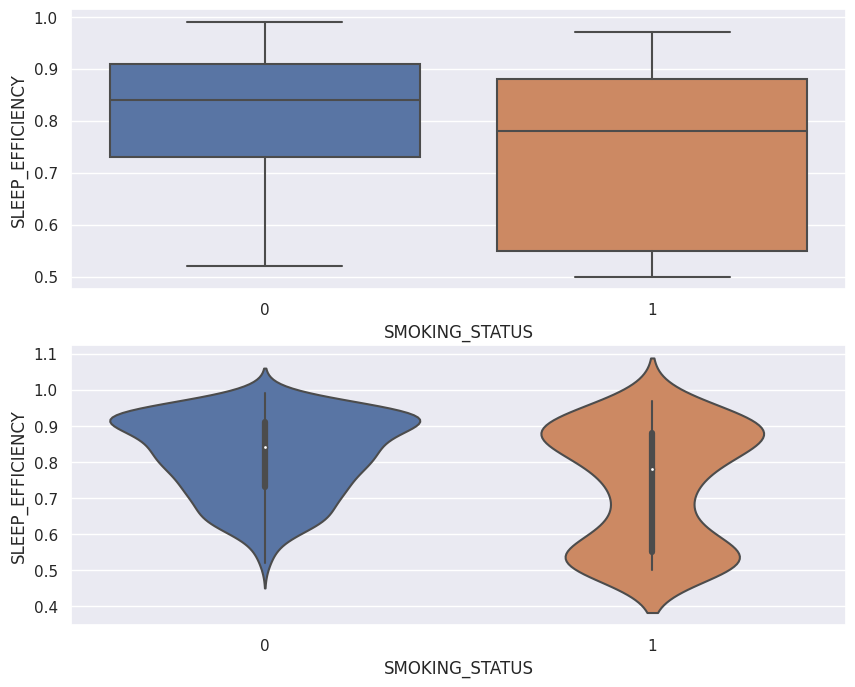

In [ ]:
f, axes = plt.subplots(2, figsize=(10, 8))
sb.boxplot(data=categorical_eda, x="SMOKING_STATUS", y="SLEEP_EFFICIENCY",  ax=axes[0])
sb.violinplot(data = categorical_eda, x='SMOKING_STATUS', y='SLEEP_EFFICIENCY', ax=axes[1])

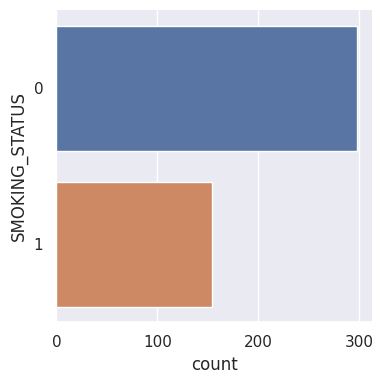

In [ ]:
sb.catplot(y = "SMOKING_STATUS", data = categorical_eda, kind = "count",
           order = categorical_eda["SMOKING_STATUS"].value_counts().index, height = 4)

__Conclusions about Smoking__:
>* Dataset is biased towards non-smokers  
>* Smoking Status is likely a significant prediction factor for Sleep Effiency
>    * Median for non-smokers is slightly higher than smokers
>    * IQR for smokers is much wider than non-smokers

#### 2.2.2 Sleep Efficiency vs Numerical Variables: <a class="anchor" id="sub_section_2_2_2"></a>

In [ ]:
numerical_eda = data_clean.copy()
numerical_eda.drop(['GENDER','SMOKING_STATUS'], axis=1, inplace=True)
column_names = list(numerical_eda.columns.values)
column_names.remove("SLEEP_EFFICIENCY")

##### PairPlot: <a class="anchor" id="sub_sub_section_2_2_2_1"></a>

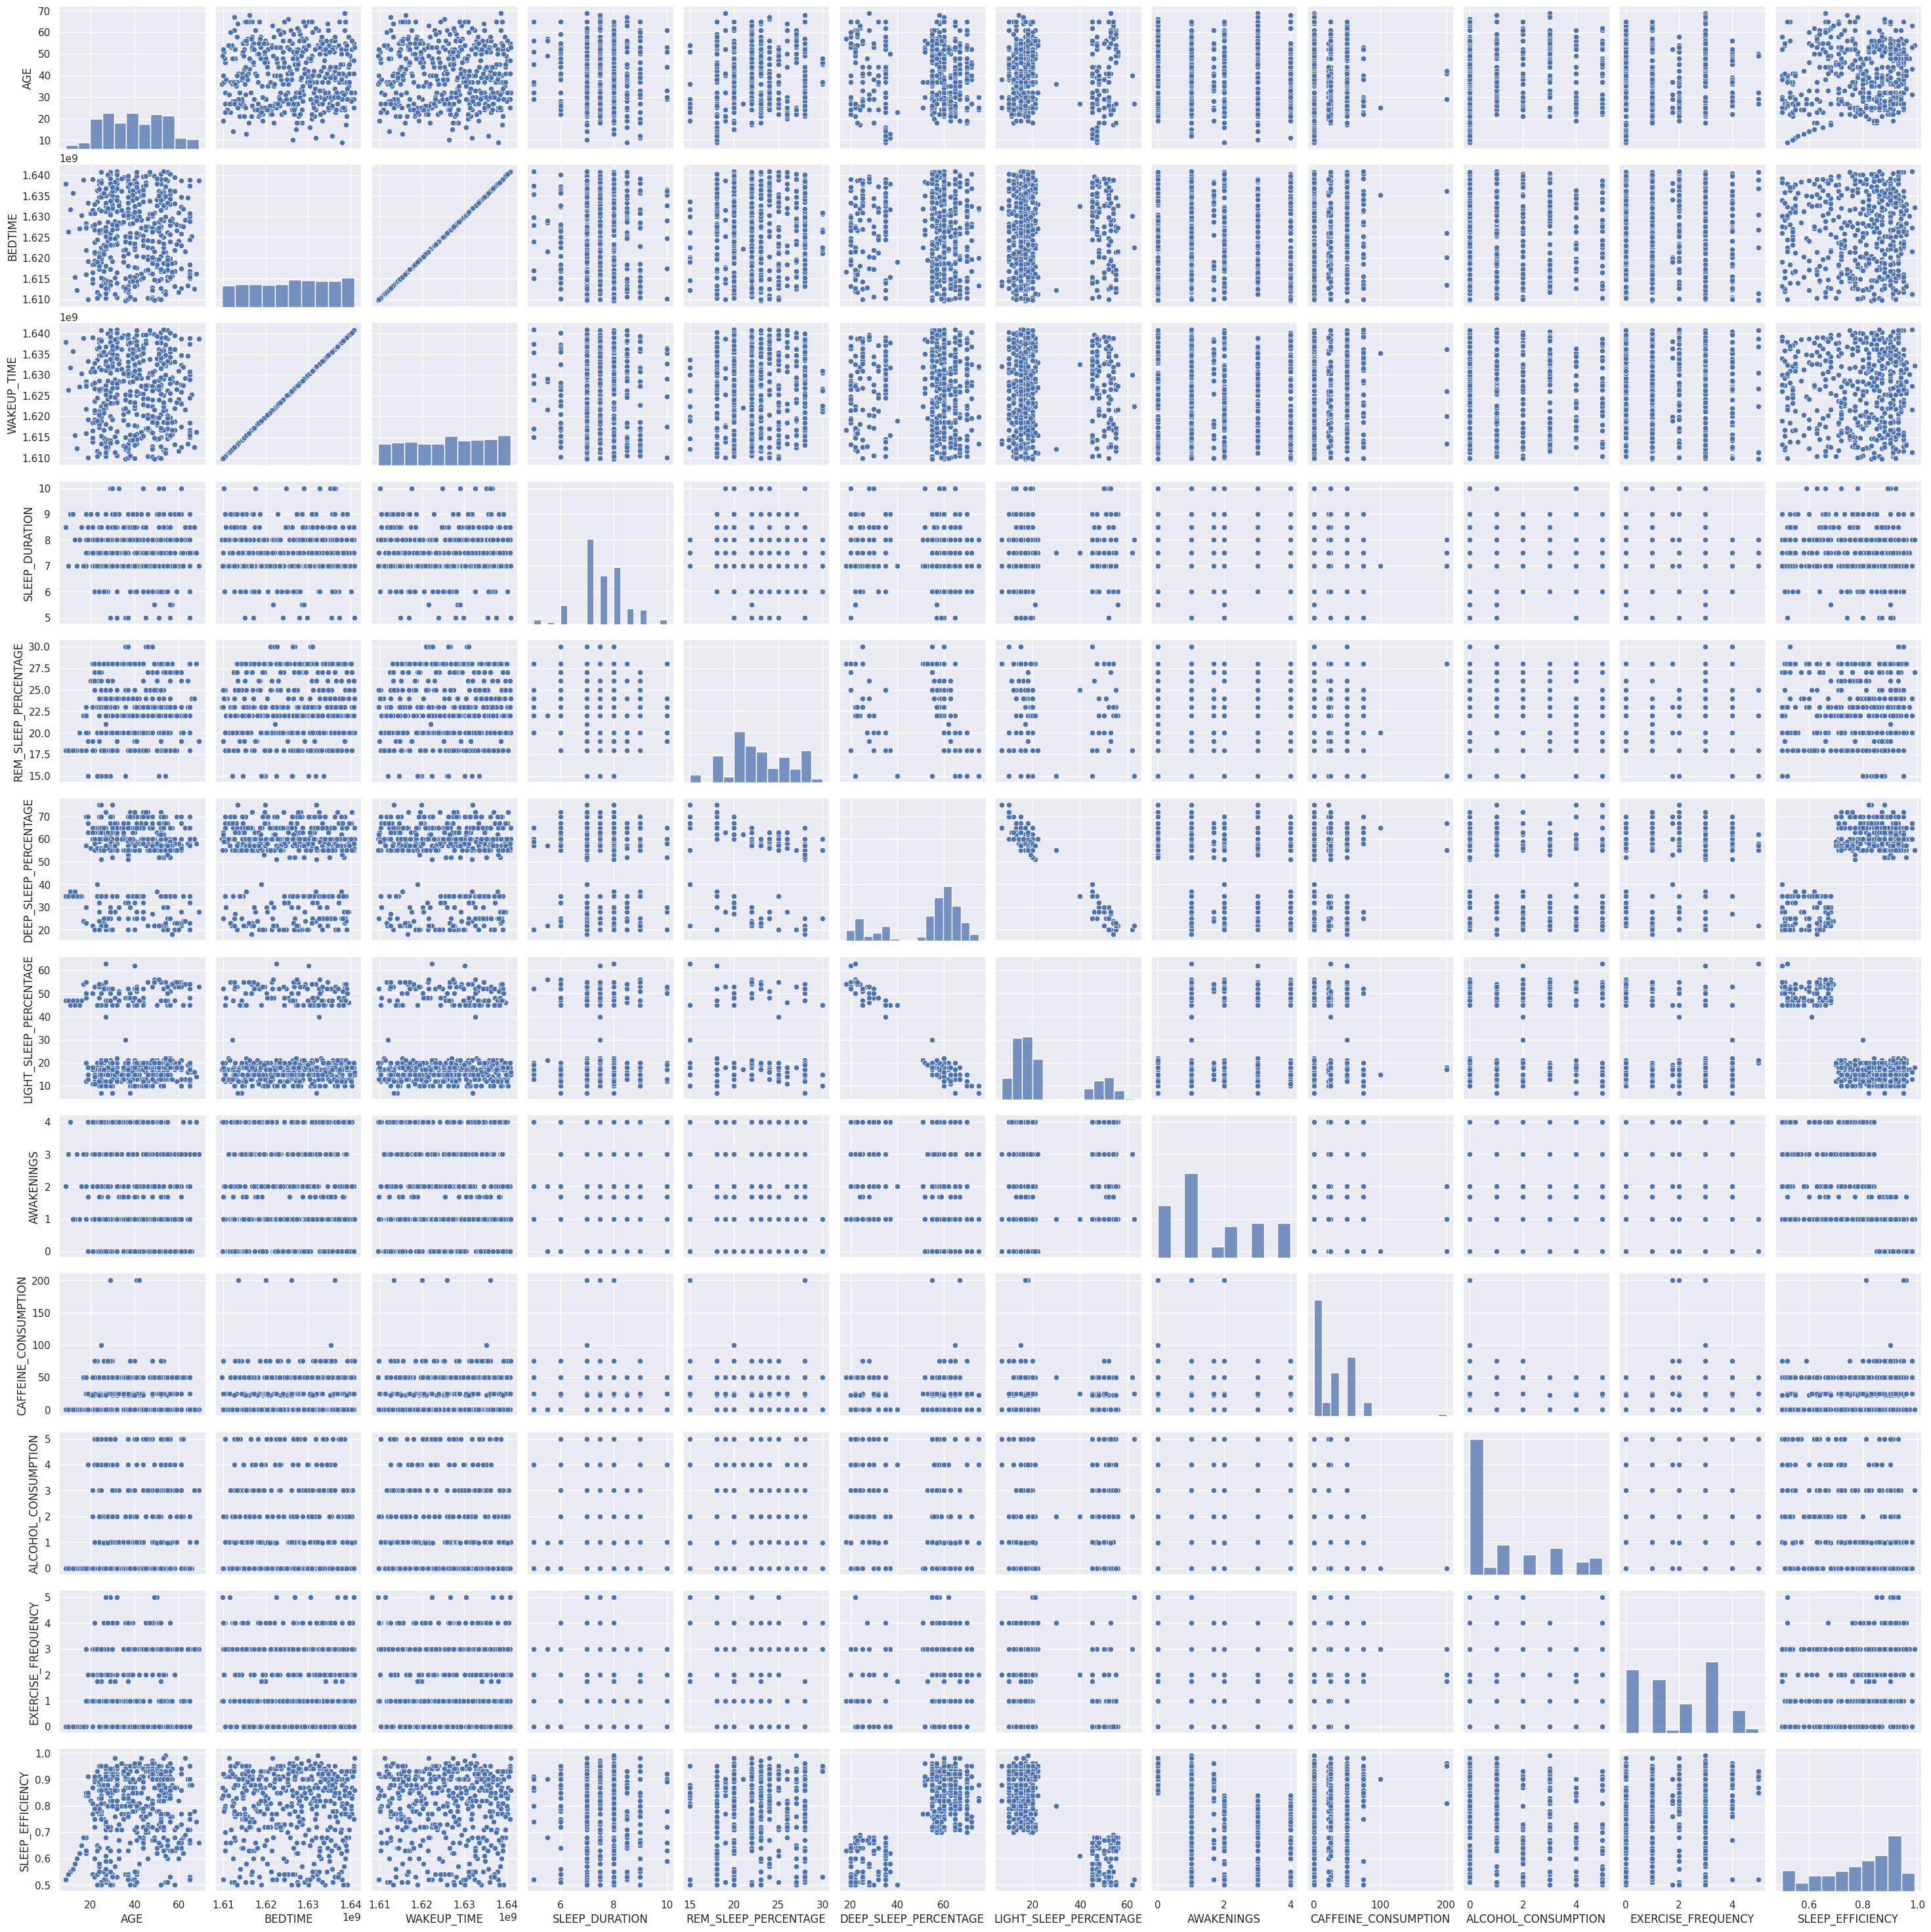

In [ ]:
sb.pairplot(numerical_eda)

__Conclusions about PairPlot__:
>* Difficult to gauge partions for many graphs
>* Deep Sleep Percentage and Light Sleep Percentage are likely significant prediction factors for Sleep Effiency
>   * Both showed clear partitioning

##### Correlation Heatmap: <a class="anchor" id="sub_sub_section_2_2_2_2"></a>

<Axes: >

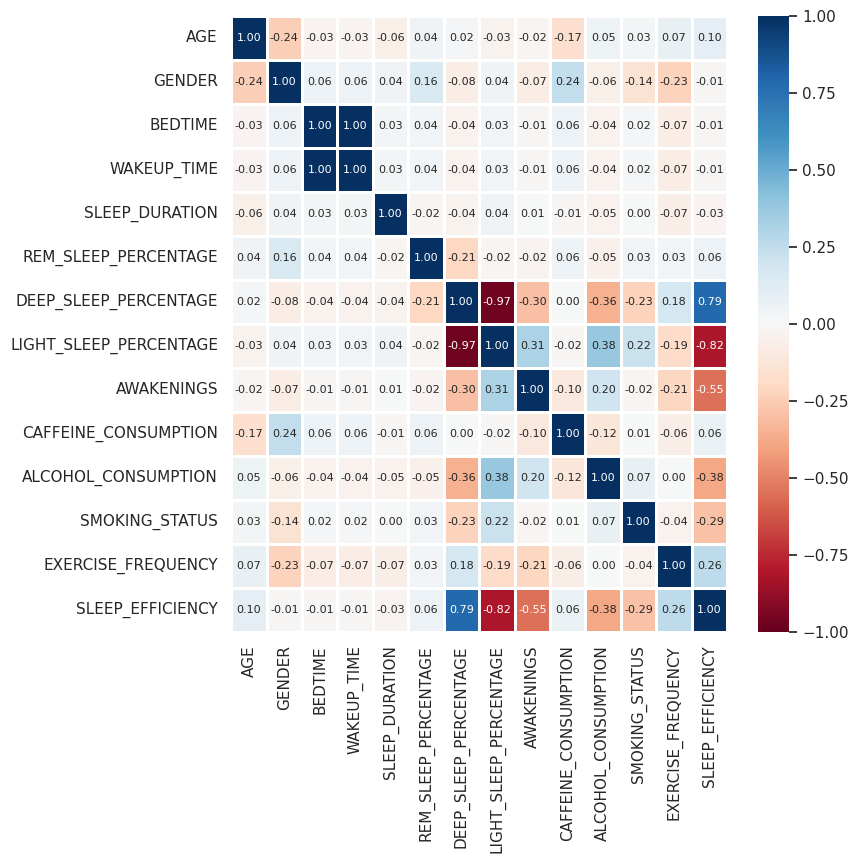

In [ ]:
f = plt.figure(figsize=(8, 8))
sb.heatmap(eda_dataset.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 8}, cmap = "RdBu")

__Conclusions about Correlation Heatmap__:
>* Several variables stand out here as potential good Sleep Efficiency predictors
>   * For Numerical, the variables with a low-moderate to high correlation are: deep sleep percentage, light sleep percentage, awakenings, alcohol consumption and exercise frequency.
>   * For Categorical, the variables are: smoking status.
>      * Aligns with previous observations about smoking status from box plot
>         * Used T-Test for more objective measure to test our hypothesis

###### T-Test: <a class="anchor" id="sub_sub_section_2_2_2_3"></a>

__Conclusions about Smoking Status T-Test__:
>* Very small pvalue of power e^-10
>   * Since it is smaller than 0.5, we can reject the NULL hypothesis and conclude there is sufficient evidence to say the two methods lead to different mean scores.

In [ ]:
group1 = eda_dataset[eda_dataset['SMOKING_STATUS']==1]
group2 = eda_dataset[eda_dataset['SMOKING_STATUS']==0]

group1.head()
group2.head()

ttest_ind(group1['SLEEP_EFFICIENCY'], group2['SLEEP_EFFICIENCY'])

Ttest_indResult(statistic=-6.4286893157053955, pvalue=3.288310567775705e-10)

## Section 3. Outlier Removal & Splitting Dataset <a class="anchor" id="chapter3"></a>
---

### 3.1 Outlier Removal: <a class="anchor" id="section_3_1"></a>

>* Z-Score Outlier Removal
>   * Removed rows with calcauted Z-Scores for each feature column that was > 3
>       * 4 rows were removed

In [ ]:
from scipy import stats

# Create a copy of the dataframe
temp_data = data_clean.copy()

# Separate the target column from the feature columns
target = temp_data['SLEEP_EFFICIENCY']
features = temp_data.drop('SLEEP_EFFICIENCY', axis=1)

# Remove outliers using the Z-Score method
z_scores = np.abs(stats.zscore(features))
features = features[(z_scores < 3).all(axis=1)]

# Get the cleaned feature indices
cleaned_feature_indices = features.index

# Combine the target column with the cleaned feature columns
temp_data = pd.concat([target.iloc[cleaned_feature_indices], features], axis=1)
temp_data.reset_index(drop=True, inplace=True)

# Print the number of rows in the dataframe before and after Z-Score outlier removal
print("PRE Z-SCORE OUTLIER REMOVAL ROWS: {}".format(data_clean.shape[0]))
print("POST Z-SCORE OUTLIER REMOVAL ROWS: {}".format(temp_data.shape[0]))

PRE Z-SCORE OUTLIER REMOVAL ROWS: 452
POST Z-SCORE OUTLIER REMOVAL ROWS: 448


### 3.2 Splitting Dataset: <a class="anchor" id="section_3_2"></a>


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
respond_Df = pd.DataFrame(eda_dataset['SLEEP_EFFICIENCY']);
predictors_DF = pd.DataFrame(eda_dataset.drop(['SLEEP_EFFICIENCY'], axis=1));
X_train, X_test, y_train, y_test = train_test_split(predictors_DF, respond_Df, test_size = 0.2);

### 3.3 Scaling Dataset: <a class="anchor" id="section_3_3"></a>
>* StandardScaler used
>   * Applied to entire feature set to normalize features
>       * Transformed dataset ranges from 0 to 1
>       * Removes Mean
>       * Changes Standard Variation to 1

In [ ]:
##Scaling

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train=pd.DataFrame(scalar.fit_transform(X_train), columns = X_train.columns)
X_test=pd.DataFrame(scalar.transform(X_test), columns = X_test.columns)

In [ ]:
X_test.head()

,AGE,GENDER,BEDTIME,WAKEUP_TIME,SLEEP_DURATION,REM_SLEEP_PERCENTAGE,DEEP_SLEEP_PERCENTAGE,LIGHT_SLEEP_PERCENTAGE,AWAKENINGS,CAFFEINE_CONSUMPTION,ALCOHOL_CONSUMPTION,SMOKING_STATUS,EXERCISE_FREQUENCY
0,1.947847,-0.975372,-0.095265,-0.090885,0.049988,0.385704,0.439724,-0.538272,-1.239512,-0.805387,-0.703415,1.408358,0.883665
1,0.944748,-0.975372,1.117463,1.112367,0.049988,-1.305460,0.767024,-0.471703,0.038830,1.821344,-0.703415,-0.710047,0.169985
2,-1.138613,1.025249,1.059316,1.053618,-1.641799,1.513147,0.112424,-0.471703,-1.239512,0.945767,-0.703415,-0.710047,-0.543695
3,-0.675644,1.025249,1.403819,1.398741,0.049988,0.667565,0.112424,-0.271994,-1.239512,0.945767,0.520521,-0.710047,2.311024
4,-0.984290,1.025249,0.285878,0.280924,0.613917,-0.178017,0.636104,-0.604842,0.038830,1.821344,0.520521,-0.710047,1.597345


## Section 4. Training Models <a class="anchor" id="chapter4"></a>
---

### 4.1 Multi-Variate Linear Regression Model: <a class="anchor" id="section_4_1"></a>



In [ ]:
   # Fitting machine learning model on the train set:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

#print('Intercept \t: b = ', linreg.intercept_)
#print('Coefficients \t: a = ', linreg.coef_)

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

    # Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()
print("Prediction Accuracy of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

#print(linreg.coef_)
#print(linreg.intercept_)
coefMVDF = pd.DataFrame(np.transpose(linreg.coef_))
coefMV= pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(linreg.coef_))], axis = 1)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8007029744051002
Mean Squared Error (MSE) 	: 0.0035116683085455037
Root Mean Squared Error (RMSE) 	: 0.05925933098293891

Prediction Accuracy of Model 	Test Dataset
Explained Variance (R^2) 	: 0.808947307478276
Mean Squared Error (MSE) 	: 0.003929506995828285
Root Mean Squared Error (RMSE) 	: 0.06268577985339487



__Conclusions about Multi-Variate Linear Regression Model__:

|Set:| Explained Variance| Root Mean Squared Error|
|---|---|---|
|Train| 0.80|0.0593|
|Test|0.81|0.0627|

>   * Our results here are good but not optimal for predicting Sleep Efficiency


### 4.2 Lasso Regression Model: <a class="anchor" id="section_4_2"></a>


In [ ]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.01)
model.fit(X_train, y_train)

pred_train_lasso= model.predict(X_train)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()
print("Prediction Accuracy of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

coefLassoDF = pd.DataFrame(np.transpose(model.coef_))
coefLasso= pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(model.coef_))], axis = 1)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7743842853062006
Mean Squared Error (MSE) 	: 0.0035116683085455037
Root Mean Squared Error (RMSE) 	: 0.05925933098293891

Prediction Accuracy of Model 	Test Dataset
Explained Variance (R^2) 	: 0.790785382714993
Mean Squared Error (MSE) 	: 0.003929506995828285
Root Mean Squared Error (RMSE) 	: 0.06268577985339487



__Conclusions about Lasso Regression Model__:

|Set:| Explained Variance| Root Mean Squared Error|
|---|---|---|
|Train| 0.77|0.0593|
|Test|0.79|0.0627|

>   * Our results here are similar to the Multi-Variate Linear Regression model.
>   * Less than optimal to predict Sleep Efficiency


### 4.3 XGVBoost Model: <a class="anchor" id="section_4_3"></a>


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [ ]:
# Create an XGBoost Regressor model
model_xgb = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)

# Create a dictionary of the model parameters
params = {
    "n_estimators": [100, 150],
    "max_depth": [5, 6, 8],
    "learning_rate": [0.1],
    "subsample": [0.4, 0.5, 0.7, 0.9],
    "colsample_bytree": [0.2, 0.5, 0.7, 0.9],
}

# Create a grid search object and fit it to the data to find the best parameters
grid = GridSearchCV(model_xgb, params, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

# Create an XGBoost regressor with the best parameters
model_xgb = XGBRegressor(n_estimators=grid.best_params_['n_estimators'],
                         max_depth=grid.best_params_['max_depth'],
                         learning_rate=grid.best_params_['learning_rate'],
                         subsample=grid.best_params_['subsample'],
                         colsample_bytree=grid.best_params_['colsample_bytree'],
                         n_jobs=4)
# Train the model
model_xgb.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model_xgb.predict(X_test)


Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
# Calculate and print metrics for Training and Testing sets
print("\n[TRAINING METRICS]")
print("Mean Absolute Error: {}".format(mean_absolute_error(y_train, model_xgb.predict(X_train))))
print("Mean Squared Error: {}".format(mean_squared_error(y_train, model_xgb.predict(X_train))))
print("Root Mean Squared Error: {}".format(np.sqrt(mean_squared_error(y_train, model_xgb.predict(X_train)))))
print("R2 Score: {}".format(r2_score(y_train, model_xgb.predict(X_train))))

print("\n[TESTING METRICS]")
print("Mean Absolute Error: {}".format(mean_absolute_error(y_test, y_pred)))
print("Mean Squared Error: {}".format(mean_squared_error(y_test, y_pred)))
print("Root Mean Squared Error: {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("R2 Score: {}".format(r2_score(y_test, y_pred)))

xgvcoefdf = pd.DataFrame(np.transpose(model_xgb.feature_importances_))
coefLasso= pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(model_xgb.feature_importances_))], axis = 1)


[TRAINING METRICS]
Mean Absolute Error: 0.0016952532017990513
Mean Squared Error: 6.1532758618081554e-06
Root Mean Squared Error: 0.0024805797430859093
R2 Score: 0.9996564255435052

[TESTING METRICS]
Mean Absolute Error: 0.035469807006500584
Mean Squared Error: 0.002307906331556291
Root Mean Squared Error: 0.048040673720882505
R2 Score: 0.8819724743363797


__Conclusions about XGBoost Model__:

|Set:| Explained Variance| Root Mean Squared Error|
|---|---|---|
|Train| 0.99|0.00248|
|Test|0.88|0.0480|

>   * Improved Explained Variance and Root Mean Sqaured Error from previous two models
>   * Much better model to predict Sleep Efficiency


## Section 5. Feature Importance: <a class="anchor" id="chapter5"></a>
---


In [ ]:
coefMV= pd.concat([pd.DataFrame(X_train.columns),coefMVDF, coefLassoDF, xgvcoefdf], axis = 1)
coefMV.columns = ['Feature:', 'Multi-Variate Model:', 'Lasso Regression Model:', 'XGVBoost Model:']
coefMV

,Feature:,Multi-Variate Model:,Lasso Regression Model:,XGVBoost Model:
0,AGE,0.011431,0.001057,0.007341
1,GENDER,-0.001379,-0.000000,0.004961
2,BEDTIME,-0.666281,0.000000,0.006549
3,WAKEUP_TIME,0.669396,0.000000,0.004278
4,SLEEP_DURATION,-0.000311,-0.000000,0.007217
5,REM_SLEEP_PERCENTAGE,0.014899,0.000000,0.008324
6,DEEP_SLEEP_PERCENTAGE,0.040860,0.000000,0.673338
7,LIGHT_SLEEP_PERCENTAGE,-0.044988,-0.083421,0.058608
8,AWAKENINGS,-0.043958,-0.037866,0.122469
9,CAFFEINE_CONSUMPTION,0.005207,0.000000,0.004594


__Conclusions about Feature Importance__:

>   * Different factors were held in different importance in the all 3 models
>   * Since XGBoost was the better model in predicting Sleep Efficiency, we should look at it's features rather than the other two models
>        * XGBoost, instead, prioritized _deep sleep percentage_, _light sleep percentage_, _awakenings_, _smoking status_ and _alcohol consumption_
>            * External habits affects sleep quality
>            * To have improved sleep and quality of life, people should refrain from smoking and alcohol while also exercising more frequently. They should try not to awaken by removing any loud distractions away from their sleep area and try not to make mid-sleep awakenings a habit.